In [1]:
import pandas as pd
import xml.etree.ElementTree as xet
from glob import glob

In [2]:
path = glob('/kaggle/input/egyptiannumberplates-1/*.xml') + glob('/kaggle/input/egyptiannumberplates-2/*.xml') + glob('/kaggle/input/egyptiannumberplates-3/*.xml')


print(path[:5])
print(path[-5:])

['/kaggle/input/egyptiannumberplates-1/2023-07-02_18-06-59_UTC.xml', '/kaggle/input/egyptiannumberplates-1/2023-04-13_01-20-06_UTC.xml', '/kaggle/input/egyptiannumberplates-1/2023-10-05_01-32-29_UTC.xml', '/kaggle/input/egyptiannumberplates-1/2023-08-05_01-15-29_UTC_1.xml', '/kaggle/input/egyptiannumberplates-1/2023-07-08_11-49-37_UTC.xml']
['/kaggle/input/egyptiannumberplates-3/2022-05-10_12-31-10_UTC.xml', '/kaggle/input/egyptiannumberplates-3/2022-04-20_22-55-50_UTC.xml', '/kaggle/input/egyptiannumberplates-3/2022-05-24_16-00-38_UTC.xml', '/kaggle/input/egyptiannumberplates-3/2022-04-14_15-08-17_UTC_2.xml', '/kaggle/input/egyptiannumberplates-3/2022-06-18_11-45-26_UTC_2.xml']


In [3]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    #filename = path[0]
    info = xet.parse(filename)
    root = info.getroot()
     # Attempt to find 'object' element
    member_object = root.find('object')
    
    if member_object is not None:
        labels_info = member_object.find('bndbox')
        if labels_info is not None:
            xmin = int(labels_info.find('xmin').text)
            xmax = int(labels_info.find('xmax').text)
            ymin = int(labels_info.find('ymin').text)
            ymax = int(labels_info.find('ymax').text)
            labels_dict['filepath'].append(filename)
            labels_dict['xmin'].append(xmin)
            labels_dict['xmax'].append(xmax)
            labels_dict['ymin'].append(ymin)
            labels_dict['ymax'].append(ymax)
        else:
            print(f"No 'bndbox' element found in {filename}")
    else:
        print(f"No 'object' element found in {filename}")

No 'object' element found in /kaggle/input/egyptiannumberplates-1/2023-10-05_01-29-06_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-16_09-49-53_UTC_10.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-12_15-23-57_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-05_22-47-56_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-02_23-52-55_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-04_11-33-49_UTC_1.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-17_12-51-41_UTC_1.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-12_20-13-47_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-10_19-18-20_UTC.xml
No 'object' element found in /kaggle/input/egyptiannumberplates-2/2022-01-13_12-52-20_UTC_2.xml
No 'object' element found in /kaggle/input/egyptian

In [4]:
df = pd.DataFrame(labels_dict)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/kaggle/input/egyptiannumberplates-1/2023-07-0...,369,564,704,803
1,/kaggle/input/egyptiannumberplates-1/2023-04-1...,584,720,679,751
2,/kaggle/input/egyptiannumberplates-1/2023-10-0...,330,498,275,363
3,/kaggle/input/egyptiannumberplates-1/2023-08-0...,368,503,678,758
4,/kaggle/input/egyptiannumberplates-1/2023-07-0...,570,758,922,1031


In [5]:
df.to_csv('labelsEG.csv',index=False)

## Object Detection Model (ResNetV2)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [7]:
df = pd.read_csv('/kaggle/working/labelsEG.csv')
df.tail()

,filepath,xmin,xmax,ymin,ymax
3580,/kaggle/input/egyptiannumberplates-3/2022-05-1...,395,473,404,446
3581,/kaggle/input/egyptiannumberplates-3/2022-04-2...,538,687,554,620
3582,/kaggle/input/egyptiannumberplates-3/2022-05-2...,156,322,393,508
3583,/kaggle/input/egyptiannumberplates-3/2022-04-1...,282,408,757,839
3584,/kaggle/input/egyptiannumberplates-3/2022-06-1...,299,372,205,240


In [8]:
import xml.etree.ElementTree as xet
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = None
    
    # Try to find the image in both folders
    for folder in ['/kaggle/input/egyptiannumberplates-1', '/kaggle/input/egyptiannumberplates-2', '/kaggle/input/egyptiannumberplates-3']:
        possible_filepath = os.path.join(folder, filename_image)
        if os.path.exists(possible_filepath):
            filepath_image = possible_filepath
            break
    
    return filepath_image
filename = df['filepath'][0]
print(filename)
getFilename(filename)

/kaggle/input/egyptiannumberplates-1/2023-07-02_18-06-59_UTC.xml


'/kaggle/input/egyptiannumberplates-1/2023-07-02_18-06-59_UTC.jpg'

In [9]:
image_path = list(df['filepath'].apply(getFilename))
print(image_path[:5])
print(image_path[-5:])

['/kaggle/input/egyptiannumberplates-1/2023-07-02_18-06-59_UTC.jpg', '/kaggle/input/egyptiannumberplates-1/2023-04-13_01-20-06_UTC.jpg', '/kaggle/input/egyptiannumberplates-1/2023-10-05_01-32-29_UTC.jpg', '/kaggle/input/egyptiannumberplates-1/2023-08-05_01-15-29_UTC_1.jpg', '/kaggle/input/egyptiannumberplates-1/2023-07-08_11-49-37_UTC.jpg']
['/kaggle/input/egyptiannumberplates-3/2022-05-10_12-31-10_UTC.jpg', '/kaggle/input/egyptiannumberplates-3/2022-04-20_22-55-50_UTC.jpg', '/kaggle/input/egyptiannumberplates-3/2022-05-24_16-00-38_UTC.jpg', '/kaggle/input/egyptiannumberplates-3/2022-04-14_15-08-17_UTC_2.jpg', '/kaggle/input/egyptiannumberplates-3/2022-06-18_11-45-26_UTC_2.jpg']


In [10]:
file_path = '/kaggle/input/egyptiannumberplates-1/2022-11-26_20-09-06_UTC.jpg'
file_path 


'/kaggle/input/egyptiannumberplates-1/2022-11-26_20-09-06_UTC.jpg'

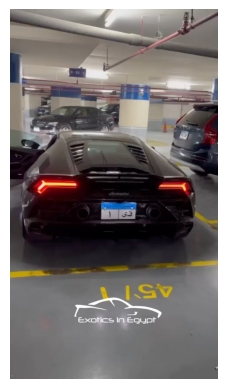

In [11]:

# Load the image
img = cv2.imread(file_path)

# Convert BGR to RGB (OpenCV loads images in BGR format by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


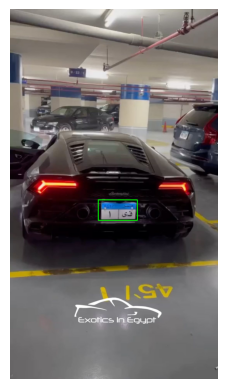

In [12]:
# Load the image
img = cv2.imread(file_path)
#change here
#458	990	661	1096
# Define the coordinates and color for the rectangle
start_point = (458, 990)
end_point = (661, 1096)
color = (0, 255, 0)  # Color in BGR format
thickness = 3

# Draw the rectangle on the image
img_with_rectangle = cv2.rectangle(img, start_point, end_point, color, thickness)

# Convert BGR to RGB (OpenCV loads images in BGR format by default)
img_rgb = cv2.cvtColor(img_with_rectangle, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
labels = df.iloc[:,1:].values

In [15]:
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # normalization
    # normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # normalized output
    # -------------- append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [16]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [17]:
X.shape,y.shape

((3585, 224, 224, 3), (3585, 4))

In [18]:
from tensorflow.keras.models import load_model
# Load the saved model
loaded_model = load_model('/kaggle/input/resnetmodelv2/object_detection_V2.h5')

# Print the model summary
loaded_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Make Prediction

Height of the image = 1350
Width of the image = 1080


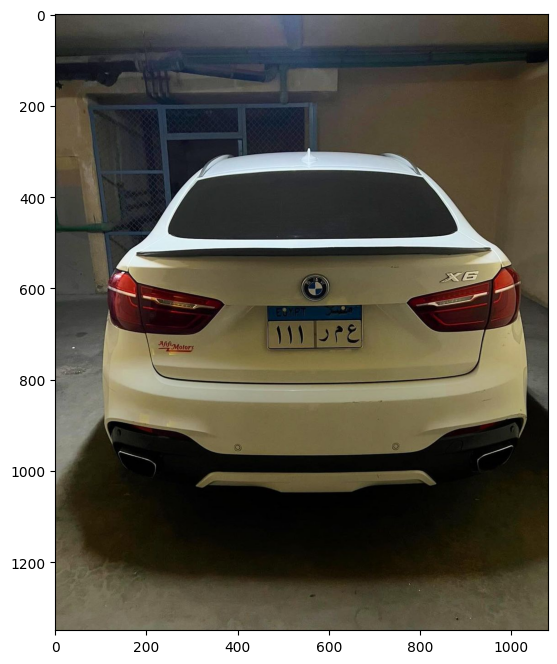

In [19]:
path = '/kaggle/input/egyptiannumberplates-1/2022-11-30_23-05-49_UTC.jpg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [20]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [21]:
coords = loaded_model.predict(test_arr)
coords

1/1 [==============================] - 9s 9s/step


array([[0.42091185, 0.64116865, 0.46090645, 0.5427751 ]], dtype=float32)

In [22]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[454.58479643, 692.46214628, 622.22370207, 732.74637759]])

In [23]:
coords = coords.astype(np.int32)
coords

array([[454, 692, 622, 732]], dtype=int32)

(454, 622) (692, 732)


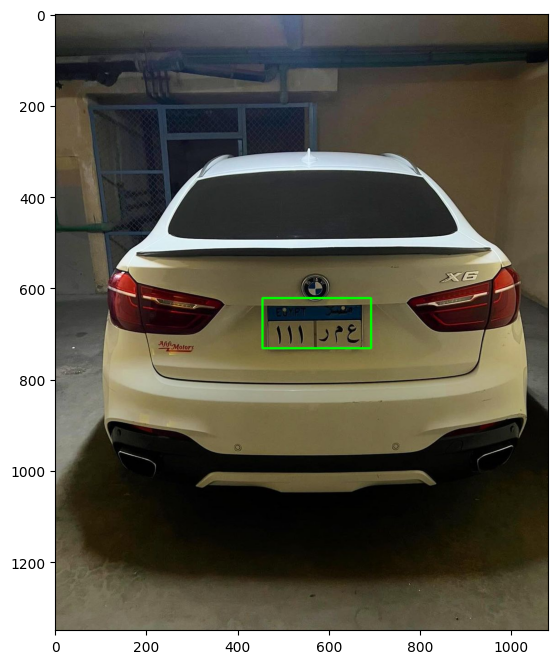

In [24]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# **APP**

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pytesseract as pt

In [26]:
!apt-get install -y tesseract-ocr-ara




The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 74 not upgraded.
Need to get 645 kB of archives.
After this operation, 1447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 0s (6297 kB/s)
Selecting previously unselected package tesseract-ocr-ara.
(Reading database ... 113818 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ara_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ara (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ara (1:4.00~git30-7274cfa-1.1) ...


In [27]:
!tesseract --list-langs

List of available languages (3):
ara
eng
osd


In [28]:
!pip install easyocr

In [29]:
from PIL import ImageDraw , Image,ImageFilter
import cv2
import matplotlib.pyplot as plt

In [30]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    height, width = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)
    
    fig = plt.figure(figsize=figsize)
    
    ax = fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    
    ax.imshow(im_data, cmap='gray')
    
    plt.show()

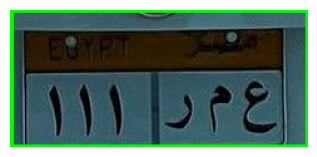

In [31]:
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

# Crop the image using NumPy array slicing
cropped_image = image[ymin:ymax, xmin:xmax]

# Save the cropped image for further processing or OCR
cv2.imwrite('cropped_image.jpg', cropped_image)
display('cropped_image.jpg')

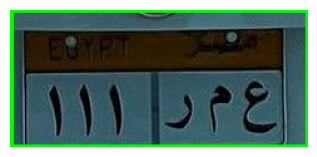

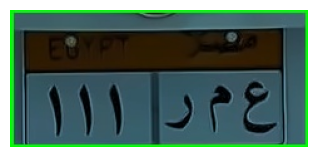

In [32]:
# Apply non-local means denoising
denoised_img = cv2.fastNlMeansDenoisingColored(cropped_image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
cv2.imwrite("denoised_img.jpg",denoised_img)
display("cropped_image.jpg")
display("denoised_img.jpg")

In [33]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

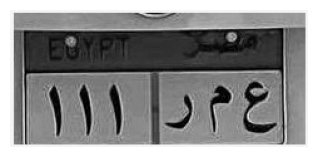

In [34]:
# Convert the image to grayscale
gray_image = grayscale(cropped_image)

# Save the grayscale image
cv2.imwrite("gray_img.jpg", gray_image)

# Display the grayscale image
display("gray_img.jpg")

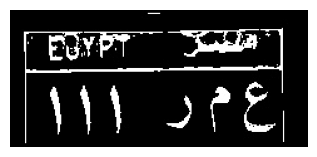

In [35]:
# _, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# _, threshold_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
threshold_image= cv2.threshold(gray_image, 20, 255, cv2.THRESH_BINARY_INV)[1]
cv2.imwrite("threshold_image.jpg", threshold_image)

# Display the grayscale image
display("threshold_image.jpg")

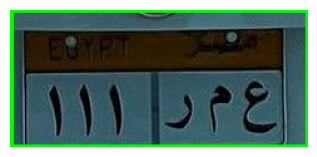

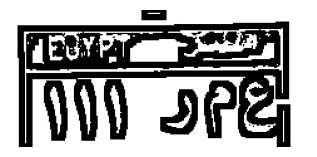

In [36]:
# Apply adaptive thresholding
im_bw = cv2.adaptiveThreshold(threshold_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite("binarized_img.jpg",im_bw)
display("cropped_image.jpg")
display("binarized_img.jpg")

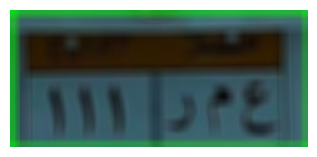

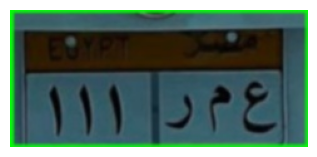

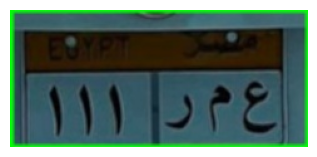

In [37]:
# Apply Box Blur with kernel size 10
im1 = cv2.blur(cropped_image, (10, 10))

# Apply Gaussian Blur with kernel size 5
im2 = cv2.GaussianBlur(cropped_image, (5, 5), 0)

# Apply regular Blur
im3 = cv2.blur(cropped_image, (3, 3))

cv2.imwrite("bluer1.jpg",im1)
display("bluer1.jpg")

cv2.imwrite("bluer2.jpg",im2)
display("bluer2.jpg")

cv2.imwrite("bluer3.jpg",im3)
display("bluer3.jpg")

In [38]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

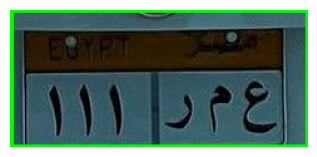

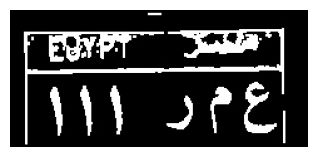

In [39]:
eroded_image = thin_font(threshold_image)
cv2.imwrite("eroded_image.jpg",eroded_image)
display("cropped_image.jpg")
display("eroded_image.jpg")

In [40]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

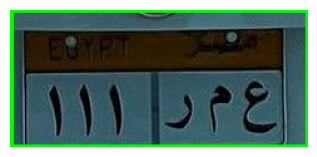

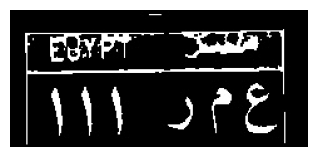

In [41]:
dilated_image = thick_font(eroded_image)
cv2.imwrite("dilated_image.jpg",dilated_image)
display("cropped_image.jpg")
display("dilated_image.jpg")

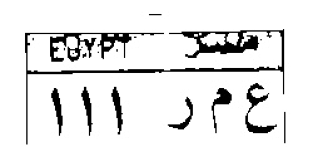

In [42]:
inverted_image = cv2.bitwise_not(dilated_image)
cv2.imwrite("inverted_image.jpg",inverted_image)
display("inverted_image.jpg")

In [43]:
# inverted_image
!pip install pytesseract


In [44]:
# Import necessary libraries
import cv2
import pytesseract

# Load the image
img = cv2.imread("dilated_image.jpg") # replace with your image path

# Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform OCR on the image
text = pytesseract.image_to_string(img, lang='ara')

# Print the extracted text
print(text)


١١١ ‏عمر‎



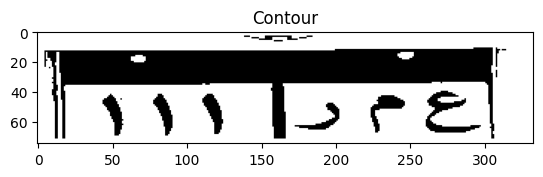

True

In [45]:

# Preprocess cropped license plate image
img_lp = cv2.resize(cropped_image, (333, 75))

# Preprocess cropped license plate image
# img_lp = cv2.resize(image, (333, 75))
img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
_, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_binary_lp = cv2.erode(img_binary_lp, (3,3))
img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

LP_WIDTH = img_binary_lp.shape[0]
LP_HEIGHT = img_binary_lp.shape[1]

# Make borders white
img_binary_lp[0:3,:] = 255
img_binary_lp[:,0:3] = 255
img_binary_lp[72:75,:] = 255
img_binary_lp[:,330:333] = 255

# Estimations of character contours sizes of cropped license plates
dimensions = [LP_WIDTH/6,
               LP_WIDTH/2,
               LP_HEIGHT/10,
               2*LP_HEIGHT/3]
plt.imshow(img_binary_lp, cmap='gray')
plt.title('Contour')
plt.show()
cv2.imwrite('contour.jpg',img_binary_lp)